This notebook contains the following preprocessing steps for BVP and ACC data: 
1. Reads in concatenated data
2. Chebyshev II filter
3. Accelerometer data filter (filter type TBA)
4. Accelerometer data upsampling to 64Hz

In [24]:
import heartpy as hp
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import cheby2, sosfilt, resample

In [6]:
os.getcwd()
os.chdir("C:\\Users\\Owner\\Rutgers University\\Michelle Chen - Rutgers_Neuropsych_Lab\\COVID_Fatigue\\RC_award\\Data\\Concatenated_Data")

In [20]:
df = pd.read_csv('cov4_lab.csv') 
df_bvp = df['BVP (64 Hz)']
df_bvp = df_bvp.to_numpy()

In [21]:
# Define filter parameters
order = 4      # Order of the filter
stopband_attenuation = 20    # Minimum attenuation required in the stopband (in dB)
# when i experiment with stopband val, i dont see a noticable change from 2-25ish
cutoff_frequency = 17        # Cutoff frequency in Hz (adjust as needed)
sampling_rate = 64.0          # The sampling rate of your BVP signal

# Design the Chebyshev type II filter
sos = cheby2(order, stopband_attenuation, cutoff_frequency, 'hp', fs=sampling_rate, output='sos')

# Apply the filter to your BVP signal
filtered_bvp = sosfilt(sos, df_bvp)

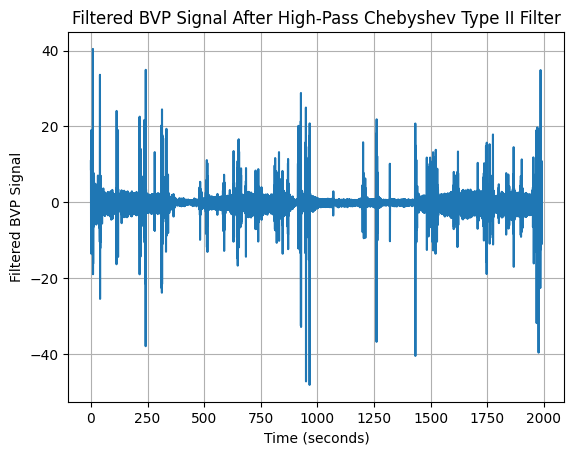

In [19]:
# Create a time array based on the length of the filtered signal and the sampling rate
time = [i / sampling_rate for i in range(len(filtered_bvp))]

# Plot the filtered BVP signal
plt.plot(time, filtered_bvp)
plt.xlabel('Time (seconds)')
plt.ylabel('Filtered BVP Signal')
plt.title('Filtered BVP Signal After High-Pass Chebyshev Type II Filter')
plt.grid(True)
plt.show()

Part 3: Filtering and Upsampling the Accelerometer data. 

In [22]:
def upsample_column(column, original_rate, target_rate):
    num_samples = len(column) * target_rate // original_rate
    return resample(column, num_samples)

In [25]:
# Convert the 'timestamp' column to pandas datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate the time difference between adjacent timestamps in the original data
time_diff = (df['timestamp'].iloc[1] - df['timestamp'].iloc[0]) / 2  # Divided by 2 because we're doubling the sample rate

# Generate the new upsampled timestamps
timestamp_upsampled = pd.date_range(df['timestamp'].min(), periods=len(df) * 64 // 32, freq=time_diff)

# Create a new DataFrame with the upsampled timestamp
df_new = pd.DataFrame({'timestamp': timestamp_upsampled})

# Add the upsampled ACC data
df_new['ACC X (64 Hz)'] = upsample_column(df['ACC X (32 Hz)'], 32, 64)
df_new['ACC Y (64 Hz)'] = upsample_column(df['ACC Y (32 Hz)'], 32, 64)
df_new['ACC Z (64 Hz)'] = upsample_column(df['ACC Z (32 Hz)'], 32, 64)

df_new

,timestamp,ACC X (64 Hz),ACC Y (64 Hz),ACC Z (64 Hz)
0,2023-02-24 14:37:32.671875000,2.000000,-7.000000,64.000000
1,2023-02-24 14:37:32.679687500,1.719106,-2.282078,60.127861
2,2023-02-24 14:37:32.687500000,-5.000000,5.000000,53.000000
3,2023-02-24 14:37:32.695312500,-9.521032,8.941277,49.152991
4,2023-02-24 14:37:32.703125000,-5.000000,5.000000,53.000000
...,...,...,...,...
254835,2023-02-24 15:10:43.570312500,-11.510252,-5.936619,60.974700
254836,2023-02-24 15:10:43.578125000,-12.000000,-6.000000,59.000000
254837,2023-02-24 15:10:43.585937500,-13.748270,-5.522634,57.633950
254838,2023-02-24 15:10:43.593750000,-12.000000,-6.000000,59.000000


In [26]:
df

,timestamp,BVP (64 Hz),EDA (4 Hz),TEMP (4 Hz),ACC X (32 Hz),ACC Y (32 Hz),ACC Z (32 Hz),Block,Fatigue_Rating
0,2023-02-24 14:37:32.671875,47.02,0.178116,31.31,2.0,-7.0,64.0,0,73
1,2023-02-24 14:37:32.687500,47.96,0.178116,31.31,-5.0,5.0,53.0,0,73
2,2023-02-24 14:37:32.703125,47.97,0.178116,31.31,-5.0,5.0,53.0,0,73
3,2023-02-24 14:37:32.718750,47.29,0.178116,31.31,15.0,-13.0,70.0,0,73
4,2023-02-24 14:37:32.734375,46.13,0.178116,31.31,15.0,-13.0,70.0,0,73
...,...,...,...,...,...,...,...,...,...
127415,2023-02-24 15:16:45.984375,27.00,0.278066,30.97,-14.0,-7.0,61.0,6,84
127416,2023-02-24 15:16:46.000000,21.61,0.278066,31.01,-13.0,-5.0,62.0,6,84
127417,2023-02-24 15:16:46.015625,16.68,0.278066,31.01,-13.0,-5.0,62.0,6,84
127418,2023-02-24 15:16:46.031250,12.02,0.278066,31.01,-12.0,-6.0,59.0,6,84
